# Bank Churn Analysis


The goal of this project is to predict customer churn using data from a bank. The dataset contains features such as customer demographics, credit score, balance, and whether they churned or not (target variable). The aim is to develop a machine learning model that accurately predicts churners, allowing the bank to target retention efforts effectively.

# Initial Overview of the Dataset:
The dataset seems to contain information about bank customers, with columns that could be useful for predicting churn (whether a customer leaves the bank). Here's a brief breakdown of the columns:

1. customer_id: Unique identifier for each customer.
2. credit_score: A numerical feature representing the credit score of the customer.
3. country: The country the customer is from (categorical feature).
4. gender: Gender of the customer (categorical).
5. age: The age of the customer.
6. tenure: How many years the customer has been with the bank.
7. balance: The bank balance of the customer.
8. products_number: The number of products the customer uses from the bank.
9. credit_card: Whether the customer owns a credit card (binary: 1 for Yes, 0 for No).
10. active_member: Whether the customer is an active member (binary: 1 for Yes, 0 for No).
11. estimated_salary: Estimated salary of the customer.
12. churn: The target variable indicating whether the customer churned (1 for Yes, 0 for No).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
path='/content/drive/My Drive/Colab Notebooks/Bank Customer Churn Prediction.csv'
df=pd.read_csv(path)
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analusis

Let's perform a thorough Exploratory Data Analysis (EDA) starting with basic steps:

1. Data Quality Check
2. Statistical Summary
3. Data Distribution
4. Categorical Variable Analysis
6. Quantifying missing values
7. Correlation Analysis
8. Feature Relation ship

In [6]:
df.shape

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 10000 rows and 12 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
#Lets start with identification of numerical and categorical data

df.dtypes

,0
customer_id,int64
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64


This dataset has, 7 int columns, 2 floating type data and 2 data objects. Let's go ahead and start with the EDA

In [10]:
#Quantifying missing data

df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


We do not have any missing data in our dataset

Going through this data, we can see that pandas has detected the salary and balance datatype as float which in my opinion is correct as these values are continuous and not discrete values. Rest of the columns are also in appropriate datatypes.

In [11]:
#Identifying numerical and categorical variables to correctly identify variable types, we need to look at the data type and inspect their values as well.

df.nunique()

,0
customer_id,10000
credit_score,460
country,3
gender,2
age,70
tenure,11
balance,6382
products_number,4
credit_card,2
active_member,2


In [ ]:
import sweetviz as sv
report=sv.analyze(df)
report.show_html('bank_churn_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report bank_churn_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

This bank has operations in 3 countries: France, Spain and Germany

In [14]:
df['gender'].value_counts()

,count
gender,
Male,5457
Female,4543


In [15]:
df['age'].value_counts().sort_values(ascending=False).head(10)

,count
age,
37,478
38,477
35,474
36,456
34,447
33,442
40,432
39,423
32,418


most of the customers are between age group 31 to 37


# **Initial Assumption**



*   **Age and Churn:** Customers between age 18 till 30 are most likely to churn as most of the people are exploring new banks/services that caters to their requirements
*   **Products and Chrun:** it is most likely that the customers having multiple products are highly satisfied and loyal customers
*   **Balance and Churn:** The customers having high bank balance are the loyal customers because they seem to enjoy the bank services are most likely part of the bank for too long
*   **Credit Card and Churn:** This seems to be tricky, the customer is more likely to churn if the services provided for the credit cards are not up to their expectations

Lets further dive into the data



# Univariate and Bivariate Analysis

In [16]:
#Lets plot the data to visualize the age and salary distribution of the data

#identify the numerical features

num_features=[]
for i in df.columns:
  if (df[i].nunique()>11) and (i!='customer_id'):
    num_features.append(i)

print(num_features)

['credit_score', 'age', 'balance', 'estimated_salary']


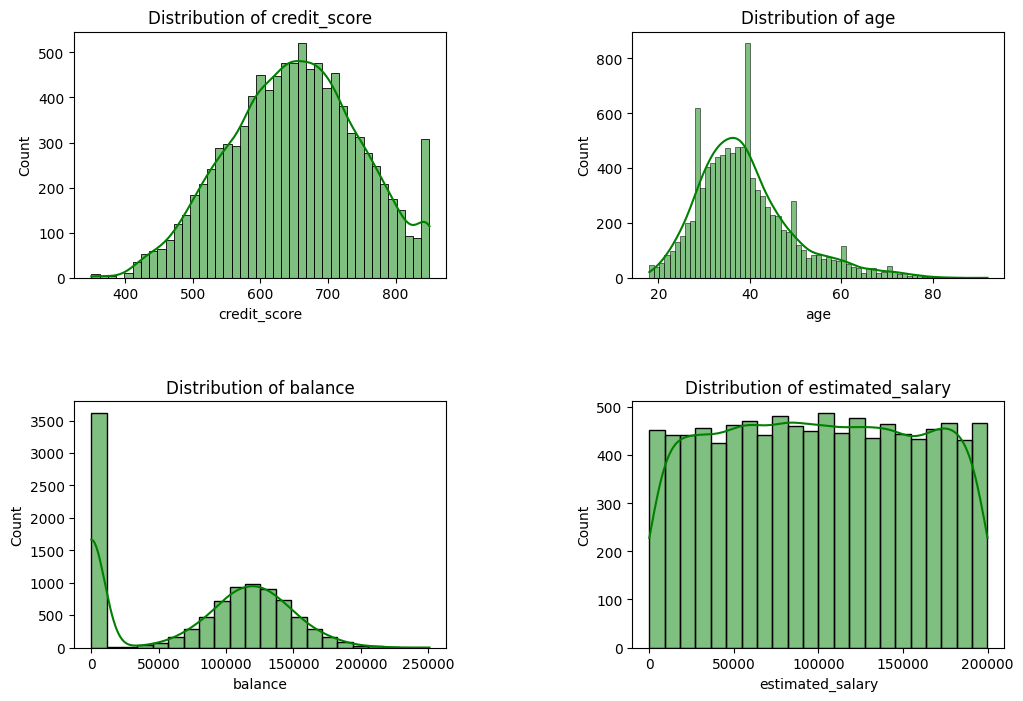

In [17]:
plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.50, wspace = 0.50)

for i in range(len(num_features)):
  plt.subplot(2,2,i+1)
  sns.histplot(df[num_features[i]],kde=True, color='green', line_kws={'color': 'blue'})
  plt.xlabel(num_features[i])
  plt.ylabel('Count')
  plt.title(f'Distribution of {num_features[i]}')

In [18]:
#Categorical Features

categorical_features=[]

for i in df.columns:
  if (df[i].nunique() <= 11) and (i!='churn'):
              categorical_features.append(i)

print(categorical_features)

['country', 'gender', 'tenure', 'products_number', 'credit_card', 'active_member']


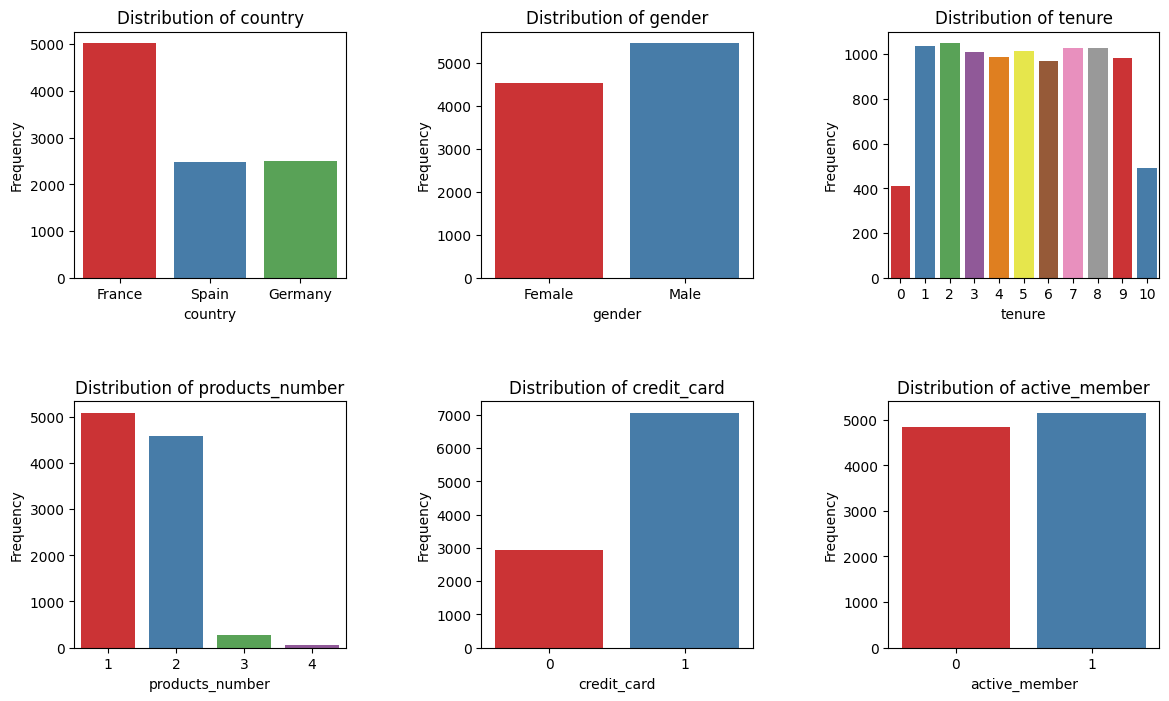

In [19]:
plt.figure(figsize=(14,8))
plt.subplots_adjust(hspace=0.5,wspace=0.5)

for i in range(len(categorical_features)):
  plt.subplot(2,3,i+1)
  sns.countplot(x=df[categorical_features[i]],palette="Set1")
  plt.xlabel(categorical_features[i])
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {categorical_features[i]}')

plt.show()

# Key Observations from the Visualizations:
# Distribution of Numerical Features:
* **Credit Score:** The distribution is fairly normal with a slight skew towards higher scores.
* **Age:** There is a large group of customers in the 30–40 age range, with fewer customers at the older and younger ends of the spectrum.
* **Balance:** Many customers have a zero balance, while the rest show a fairly wide distribution.
* **Estimated Salary:** The salary distribution is quite uniform, indicating a diverse range of income levels among customers.

# Categorical Variables and Churn:

* **Country vs Churn:** The churn rate seems fairly consistent across the three countries, though it might be slightly higher in Germany.
* **Gender vs Churn:** Both male and female customers seem to churn at similar rates, with a slightly higher number of male customers overall.
* **Tenure:** The tenure is relatively evenly distributed, although there is a slight peak at 1 year.
* **Products Number:** Most customers use only one or two products, with very few using three or more.
* **Credit Card:**: Most users are using credit cards, pointing that the customers can churn.
* **Active_member:** Active members are slightly higher than the inactive members. Further analysis should be done for the inactive members, since those member can leave the bank anytime


# **Churn Analysis**

In [20]:
df['churn'].value_counts()

,count
churn,
0,7963
1,2037


In [21]:
churn_rate=df['churn'].value_counts()/df.shape[0]*100
churn_rate

print(churn_rate[1])
#We have 20% of churned customer showing that the data is highly imbalanced

20.369999999999997


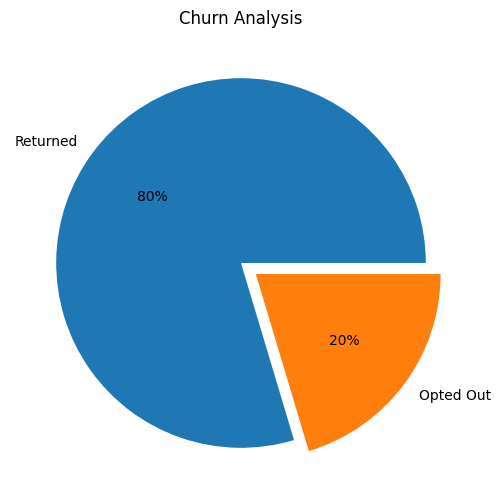

In [22]:
plt.figure(figsize=(10,6))

keys=["Returned","Opted Out"]
explode = [0, 0.1]
plt.pie(churn_rate,labels=keys,explode=explode, autopct='%.0f%%')
plt.title('Churn Analysis')
plt.show()

# Correlation Analysis:

We will now perform a correlation analysis to check relationships between the numerical features and the target variable (churn), and then proceed with more detailed pairwise feature relationships to gather deeper insights. Let's generate a correlation matrix and visualize it using a heatmap.

In [23]:
#Correlation Analysis for Numerical Features

correlation_matrix=df.corr(numeric_only=True)
correlation_matrix

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


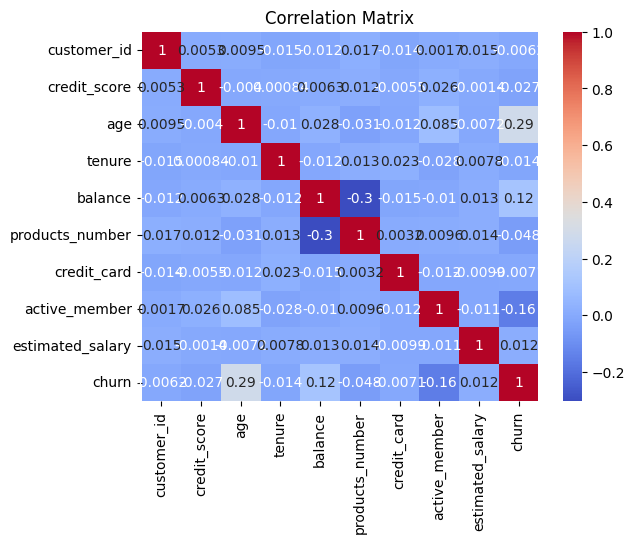

In [24]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the correlation heatmap, we can observe the following key points:

# **Churn Correlation:**

* **Balance:** There is a moderate positive correlation between balance and churn (0.12), suggesting that customers with higher balances may be slightly more likely to churn.
* **Age:** A positive correlation with churn (0.29), indicating that older customers are more likely to churn.
* **Products Number:** Shows a slight positive correlation with churn (0.10), meaning customers with more products may be more prone to churn.
* **Active Member**: Has a negative correlation (-0.16) with churn, meaning active members are less likely to churn.
* **Credit Score:** Has a slight negative correlation (-0.07) with churn, indicating that customers with lower credit scores are slightly more likely to churn.

**Other Feature Correlations:**

* **Credit Score and Balance:** These two are slightly positively correlated, suggesting that customers with higher credit scores tend to have higher balances.
* **Tenure and Age:** There is a moderate correlation (0.23) between these features, which is expected, as older customers are likely to have a longer tenure.
The correlations are generally low, but age, balance, and active member status stand out as potential key predictors of churn.

#**Correlation Analysis: Categoricla features and Churn**

1. **Chi-Square Test:**
* The Chi-Square test evaluates whether there is a statistical association between two categorical variables. It gives a p-value to determine if the relationship is significant.
* However, the Chi-Square test alone does not tell you the strength or magnitude of the association between the variables. It only tells you whether an association exists based on the p-value.
* In other words, Chi-Square only answers the question: "Is there a statistically significant relationship?"
2. **Cramér's V:**
* Cramér's V is derived from the Chi-Square statistic and is used to measure the strength of the association between two categorical variables.
* It ranges from 0 to 1, where 0 indicates no association, and 1 indicates a strong association. Thus, Cramér's V helps quantify how strong the relationship is.
* Cramér's V answers the question: "If there's a relationship, how strong is it?"
* **When to Use Each:**
* Use Chi-Square when you want to test if a statistically significant relationship exists between two categorical variables (e.g., whether gender influences churn).
* Use Cramér's V to measure the strength of the relationship if the Chi-Square test shows that an association exists.
* **Why Not Just Use Chi-Square?**
While the Chi-Square test tells you if a relationship is significant, Cramér's V helps you understand the magnitude of that relationship. In our context of feature selection and EDA, we want to know both:

* **Is there an association? (Chi-Square)**
* **How strong is the association? (Cramér's V)**

In [25]:
#Correlation Analysis for Categorical Data

from scipy.stats import chi2_contingency

# Create a confusion matrix for gender and churn
confusion_matrix = pd.crosstab(df['gender'], df['churn'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(confusion_matrix)

# Calculate Cramér's V for the strength of association
n = confusion_matrix.sum().sum()
r, k = confusion_matrix.shape
cramers_v = np.sqrt(chi2_stat / (n * (min(r, k) - 1)))



In [26]:
print(f"Chi-Square Statistic for gender: {chi2_stat}")
print(f"P-value for gender: {p_value}")
print(f"Cramér's V for gender: {cramers_v}")

Chi-Square Statistic for gender: 112.91857062096116
P-value for gender: 2.2482100097131755e-26
Cramér's V for gender: 0.10626315006669113


In [27]:
# Create a confusion matrix for country and churn
confusion_matrix = pd.crosstab(df['country'], df['churn'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(confusion_matrix)

# Calculate Cramér's V for the strength of association
n = confusion_matrix.sum().sum()
r, k = confusion_matrix.shape
cramers_v = np.sqrt(chi2_stat / (n * (min(r, k) - 1)))

print(f"Chi-Square Statistic for country: {chi2_stat}")
print(f"P-value for country: {p_value}")
print(f"Cramér's V for country: {cramers_v}")

Chi-Square Statistic for country: 301.25533682434536
P-value for country: 3.8303176053541544e-66
Cramér's V for country: 0.17356708697916934


##Interpretation of the Results:

1. **Gender and Churn:**
* The p-value is very small, indicating that there is a
statistically significant association between gender and churn. In other words, gender plays some role in predicting churn.
* However, the Cramér's V value of 0.106 suggests that the strength of the association is relatively weak. While there is an association, it isn't very strong, but it might still be useful to include gender in the model.

2. **Country and Churn:**
* Similarly, the p-value is extremely small, indicating that
there is a significant association between country and churn.
* The Cramér's V value of 0.174 suggests a stronger association between the country and churn compared to gender. While it is still moderate, it has more predictive potential than gender.

##**Conclusion:**
* Both gender and country have statistically significant associations with churn, but country shows a stronger correlation with churn than gender.
* Even though these associations are not very strong (especially for gender), they are still statistically significant, which implies that they can contribute to the prediction model.

Data Exploration:

*  **Customer ID:** Useful for uniquely identifying each customer but not directly relevant for prediction.
* **Credit Score:** Highly relevant as it can indicate the financial health and risk profile of a customer.
* **Geography:** Relevant, as customer behavior can vary by region.
* **Gender:** Relevant, as there might be differences in churn rates between genders.
* **Age:** Highly relevant, as age can correlate with financial behavior and stability.
* **Tenure:** Highly relevant, as longer-tenured customers might have different churn probabilities.
* **Balance:** Relevant, as account balance can indicate customer engagement and financial health.
* **Products_Number:** Highly relevant, as the number of products used can indicate customer loyalty and satisfaction.
* **Debit_Card:** Relevant, as having a credit card might indicate deeper engagement with the bank.
* **active_member:** Highly relevant, as active members are less likely to churn.
* **Estimated_Salary:** Relevant, as income levels can influence financial behavior and satisfaction.
* **Churn:** Target variable, indicating whether the customer has churned.

# **Handling Outliers**

Outliers can distort model performance, especially for algorithms sensitive to data distribution. We'll check the presence of outliers in numerical features using boxplots.
Possible actions to handle outliers:
* Capping/Flooring: Limit the extreme values to a certain percentile (e.g., 1st and 99th percentiles).
* Removing Outliers: For extreme cases, we may remove data points that are clear outliers.

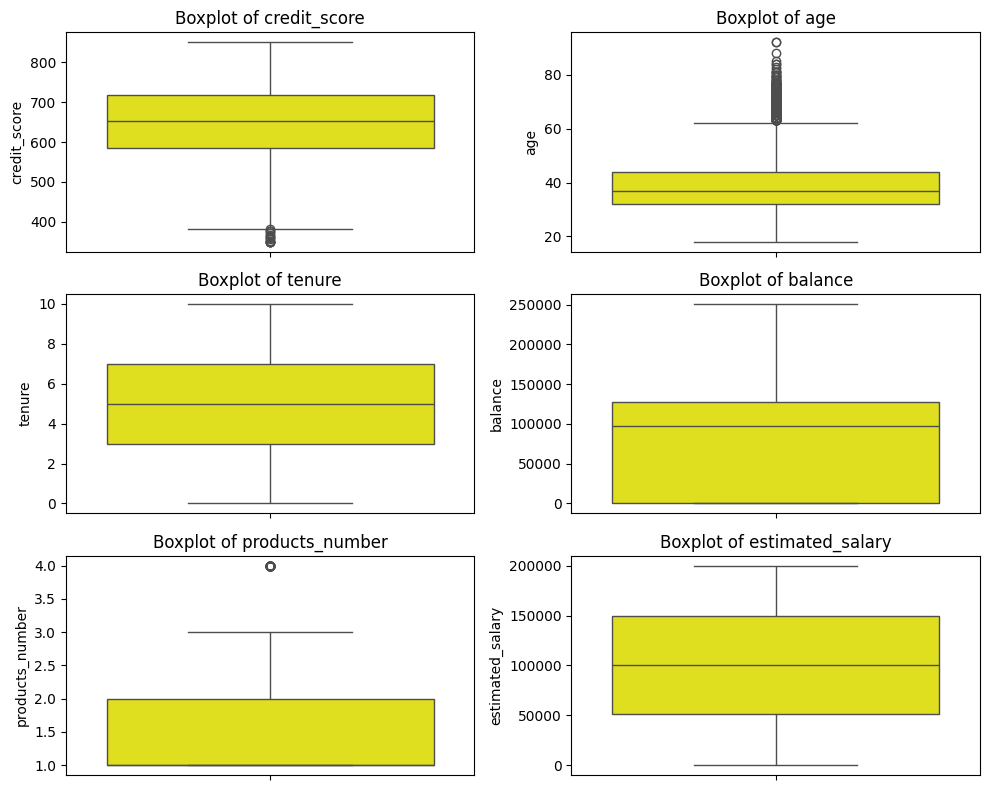

In [33]:
# Step 1: Visualize outliers using boxplots for numerical features

plt.figure(figsize=(10, 8))
for i, column in enumerate(['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary'], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[column], color='yellow')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


# **Outliers Observations**:
* **Credit Score:** A few outliers exist, but they aren't extreme enough to warrant removal.
* **Age:** There are a few higher outliers above age 70, but again, these may represent valid customers.
* **Tenure:** No significant outliers observed.
* **Products Number:** A few outliers for customers with more than 3 products.
* **Estimated Salary:** No significant outliers.
* **Balance:** The missing lower whisker suggests that a large number of customers have a balance of zero. This is typical in banking data, where many customers might have inactive or minimal accounts with no balance. Since the upper whisker does exist and likely extends to higher balances, any customers with extremely high balances would be considered outliers.

# **Outlier Handling Strategy:**

For extreme outliers (e.g., high balances), we will apply capping at the 99th percentile to reduce their impact. We will keep less significant outliers, as they likely represent valid data points.

Let's cap the extreme outliers now, particularly for the balance and products_number features.

In [34]:
#Handle outliers by capping at the 1st and 99th percentiles

# Define a function to cap the values based on percentiles
def cap_values(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply capping to 'balance' and 'products_number' (features with visible outliers)
cap_values(df, 'balance')
cap_values(df, 'products_number')

# Check to ensure outliers have been capped
df[['balance', 'products_number']].describe()


,balance,products_number
count,10000.000000,10000.000000
mean,76369.720704,1.524200
std,62172.016053,0.560933
min,0.000000,1.000000
25%,0.000000,1.000000
50%,97198.540000,1.000000
75%,127644.240000,2.000000
max,185967.985400,3.000000


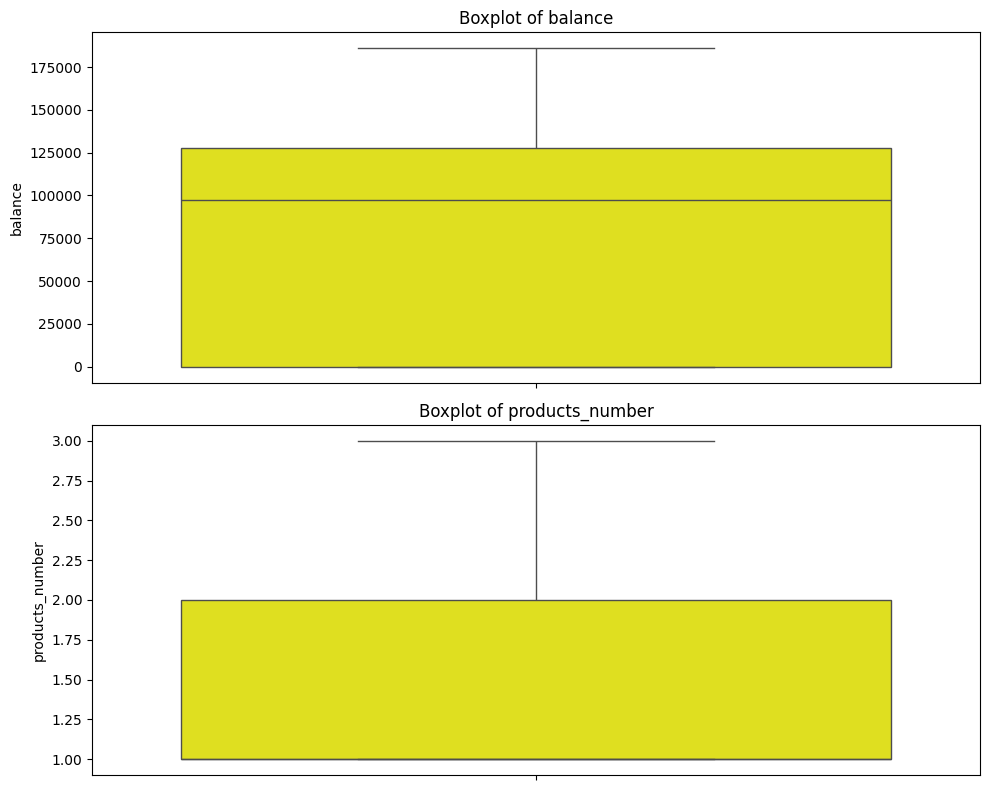

In [35]:
plt.figure(figsize=(10, 8))
for i, column in enumerate(['balance', 'products_number'], 1):
    plt.subplot(2, 1, i)
    sns.boxplot(y=df[column], color='yellow')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

The extreme values in balance and products_number have been capped at the 99th percentile, effectively reducing the impact of outliers.

# **Feature Engineering:**

we've explored the dataset thoroughly, we can move on to feature engineering to enhance model performance. We can create new features, handle categorical data (like one-hot encoding for categorical features), and prepare the data for machine learning models.
Based on the EDA, we'll take the following steps to prepare the dataset for modeling:

1. **Handle Categorical Variables:** Convert the categorical variables (country, gender) into numerical format using one-hot encoding, which will create separate binary columns for each category.
2. **Feature Scaling:** Normalize or standardize features that have large ranges (e.g., balance, age, estimated_salary). This step is particularly important for algorithms that are sensitive to the scale of features (like logistic regression or neural networks).
3. **Create New Features:**
* ***Balance-to-Salary Ratio:*** Create a new feature that represents the ratio of balance to estimated_salary as it may provide insight into a customer's financial standing relative to their income.
* ***Is Senior Customer:*** Create a binary feature to capture customers who are above a certain age (e.g., 60), since older customers tend to have a higher churn rate. Added a binary feature (is_senior) to indicate whether the customer is above 60 years old.


In [36]:
# Step 1: Handle categorical variables with one-hot encoding
df_encoded = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

In [37]:
# Step 2: Create new features
# Balance-to-salary ratio
df_encoded['balance_salary_ratio'] = df_encoded['balance'] / (df_encoded['estimated_salary'] + 1e-5)  # Adding small value to avoid division by zero

In [38]:
# Is senior customer (binary feature: 1 if age > 60, else 0)
df_encoded['is_senior'] = df_encoded['age'].apply(lambda x: 1 if x > 60 else 0)



In [39]:
df_encoded.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male,balance_salary_ratio,is_senior
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False,0.000000,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False,0.744677,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False,1.401375,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False,0.000000,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False,1.587055,0


In [44]:
# Step 3: Feature Scaling (normalizing balance, age, estimated_salary)
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler=StandardScaler()

# Fit and transform the selected columns
df_encoded[['balance', 'age', 'estimated_salary', 'balance_salary_ratio']] = scaler.fit_transform(df_encoded[['balance', 'age', 'estimated_salary', 'balance_salary_ratio']])


In [45]:
df_encoded.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male,balance_salary_ratio,is_senior
0,15634602,619,0.293517,2,-1.228423,1,1,1,0.021886,1,False,False,False,-0.035762,0
1,15647311,608,0.198164,1,0.119644,1,0,1,0.216534,0,False,True,False,-0.028887,0
2,15619304,502,0.293517,8,1.339755,3,1,0,0.240687,1,False,False,False,-0.022825,0
3,15701354,699,0.007457,1,-1.228423,2,0,0,-0.108918,0,False,False,False,-0.035762,0
4,15737888,850,0.388871,2,0.790445,1,1,1,-0.365276,0,False,True,False,-0.021111,0


# **Addressing Class Imbalance:**

We had previously observed that the target variable (churn) is imbalanced (about 20% churn), this could lead to biased models that favor the majority class (non-churn).
* Common methods to handle class imbalance:
     * **Oversampling:** Increase the number of churn cases by duplicating them (e.g., using SMOTE). This technique creates synthetic samples for the minority class (churned customers) to balance the dataset.
     * **Undersampling:** Reduce the number of non-churn cases.  This reduces the size of the majority class (non-churned customers) to balance the dataset.
     * **Class Weights:** Many machine learning algorithms (like logistic regression, decision trees) have a class_weight parameter to assign more weight to the minority class during training.

We will go with Class weight method as we do not want to alter the data or any other overfitting problem.


Next Steps are as follows:

1. **Split the Data:**
Train-Test Split: Split the data into training and test sets (e.g., 70% train, 30% test) to ensure you can evaluate the model on unseen data.
2. **Select and Train Models:**
* **Model Selection:** Select a model based on the its performance. In this case we will use LazyPredict to pick the best fit model
* **Class Weights:** Apply class weights to handle the class imbalance during training.
3. **Model Evaluation:**
* **Metrics:** Focus on key evaluation metrics, especially for the minority class (churn) Precision, Recall, F1-Score (especially recall to capture churn correctly).
* **Confusion Matrix:** To check true positives and false positives for churn.
* **Cross-Validation:** Use cross-validation to ensure model robustness.
4. **Hyperparameter Tuning:**
* **Grid Search or Random Search:** Optimize model parameters to improve performance, particularly for models like Random Forest and Gradient Boosting.
5. **Test on the Unseen Data:**
Evaluate the tuned model on the test set to get the final performance metrics.
6. **Model Selection and Finalization:**
Based on performance (recall, F1-score, etc.), select the best model for predicting churn.


In [46]:
from sklearn.model_selection import train_test_split

#Define independent features and target feature
# We are exluding churn and customer_id since customer_id is least important feature for ML

X=df_encoded.drop(columns=['customer_id','churn'])
y=df_encoded['churn']

#Split the data into training and test sets (70% train, 30% test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

# Display the shape of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7000, 13)
X_test shape: (3000, 13)
y)train shape: (7000,)
y_test shape: (3000,)


Now that we have split the training and test data. We will use LazyPredict, it allows you to compare multiple machine learning models and their performance on the dataset without extensive code for each model. Once we have identified which model will perform well with the dataset and the we can focus on the model fine tuning.

In [52]:
from lazypredict.Supervised import LazyClassifier

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# Fit the classifier on the training data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the model performance
print(models)


 97%|█████████▋| 30/31 [00:16<00:00,  2.03it/s]

[LightGBM] [Info] Number of positive: 1426, number of negative: 5574
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1110
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203714 -> initscore=-1.363240
[LightGBM] [Info] Start training from score -1.363240


100%|██████████| 31/31 [00:16<00:00,  1.85it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.85               0.71     0.71      0.84   
NearestCentroid                    0.70               0.70     0.70      0.73   
LGBMClassifier                     0.85               0.70     0.70      0.84   
RandomForestClassifier             0.85               0.70     0.70      0.84   
XGBClassifier                      0.84               0.69     0.69      0.83   
ExtraTreesClassifier               0.85               0.69     0.69      0.83   
BaggingClassifier                  0.83               0.68     0.68      0.82   
KNeighborsClassifier               0.83               0.68     0.68      0.82   
SVC                                0.86               0.68     0.68      0.83   
ExtraTreeClassifier                0.78               0.67     0.67      0.78   
LabelSpreading              

**AdaBoostClassifier**, **RandomForestClassifier** and **LogisticRegression** seem to be the best contenders.

* **Balanced Accuracy and ROC AUC:** Both AdaBoost and RandomForest/LGBM have higher Balanced Accuracy and ROC AUC scores compared to Logistic Regression, indicating better overall performance in handling the imbalance in the data. Balanced Accuracy takes into account the imbalance in the classes, and ROC AUC reflects how well the model distinguishes between churn and non-churn cases.
* **F1 Score:** All three models (AdaBoost, RandomForest, LGBM) have high F1-scores (0.84), which indicates they are effective at balancing precision and recall for churn detection. Logistic Regression's F1-score is slightly lower (0.79), indicating it may not perform as well at catching churn cases.

Let me re-iterate our goal is to predict whether a customer will churn or not, which is a binary outcome (churn = 1, no churn = 0). Since the target variable is categorical (binary in this case), the task is to classify each customer into one of the two classes (churn or no churn). Logistic Regression, RandomForestClassifier, and AdaBoostClassifier are appropriate choices because they are designed for classification tasks.

# **Model Evaluation:**
Apply Class Weights to handle class imbalance for these models.
Train and Evaluate the models, focusing on metrics like F1-score, balanced accuracy, and ROC AUC.
Hyperparameter Tuning to further optimize the models and improve performance.


1. **AdaBoost:** AdaBoost doesn't directly have a class_weight parameter, but since it is built on decision trees (which can handle imbalanced data), it performs reasonably well. If needed, we can use a weighted base estimator.
2. **Random Forest:** Add class_weight='balanced' to handle class imbalance.
3. **Logistic Regression:** Use class_weight='balanced' to make the model focus more on the minority class (churn).



In [54]:
#We will import the necessary libraries to run the models
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [55]:
#Initialize Models
log_reg=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
random_forest_clf=RandomForestClassifier(class_weight='balanced',random_state=42)
adaboost_clf=AdaBoostClassifier(random_state=42)

#Train Models
log_reg.fit(X_train,y_train)
random_forest_clf.fit(X_train,y_train)
adaboost_clf.fit(X_train,y_train)

#Make Predictions on the test set
log_reg_prediction=log_reg.predict(X_test)
random_forest_prediction=random_forest_clf.predict(X_test)
adaboost_prediction=adaboost_clf.predict(X_test)

#Model evaluation.

#Printing Logistic Regression Results
print("Logistic Regression Performance Result:")
print(classification_report(y_test,log_reg_prediction))
print(f"ROC AUC: {roc_auc_score(y_test,log_reg.predict_proba(X_test)[:, 1])}")


#Printing Random Forest Result
print("\nRandom Forest Performance Result:")
print(classification_report(y_test,random_forest_prediction))
print(f"ROC AUC: {roc_auc_score(y_test,random_forest_clf.predict_proba(X_test)[:, 1])}")

#Printing ADABoost Performance

print("\n ADABoost Performance Result:")
print(classification_report(y_test,adaboost_prediction))
print(f"ROC AUC: {roc_auc_score(y_test,adaboost_clf.predict_proba(X_test)[:, 1])}")


Logistic Regression Performance Result:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      2389
           1       0.40      0.74      0.52       611

    accuracy                           0.72      3000
   macro avg       0.66      0.73      0.66      3000
weighted avg       0.81      0.72      0.75      3000

ROC AUC: 0.8050516586180935

Random Forest Performance Result:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.77      0.45      0.57       611

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000

ROC AUC: 0.8647887652011162

 ADABoost Performance Result:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.75      0.50      0.60       611

    accuracy        

#** Interpretation of Results**

##**Logistic Regression:**
* Precision (churn class): 0.40 means the model makes a lot of false positives (incorrectly predicting churn when they don’t churn).
* Recall (churn class): 0.74 means the model catches most of the churners, but at the expense of some false positives.
* F1-score: 0.52 shows a balance between precision and recall, but still not optimal for churn.
*ROC AUC: 0.805 shows decent ability to separate churners from non-churners, but there is room for improvement.

## **Random Forest:**
* Precision (churn class): 0.77 is higher than Logistic Regression, meaning it makes fewer false positives.
* Recall (churn class): 0.45 is lower, meaning it misses many actual churners.
* F1-score: 0.57 indicates an imbalance between precision and recall, with a better focus on precision than recall.
* ROC AUC: 0.865 indicates strong capability to distinguish between churners and non-churners.

## **AdaBoost:**
* Precision (churn class): 0.75 is similar to Random Forest, meaning relatively few false positives.
* Recall (churn class): 0.50 is slightly better than Random Forest, catching half of the actual churners.
* F1-score: 0.60 shows a better balance between precision and recall than Random Forest.
* ROC AUC: 0.865 indicates that AdaBoost, like Random Forest, is good at separating churners from non-churners.

## **Conclusion based on the results:**
* **Logistic Regression** performs reasonably well at identifying churners (high recall), but at the cost of more false positives (low precision).
* Random Forest has high precision but lower recall, meaning it predicts fewer false positives but misses more churners.
* **AdaBoost** balances precision and recall better than Random Forest, making it a strong candidate for identifying churn while maintaining a decent number of correct predictions. We will stick with AdaBoost and now move on to the next step which is hyperparameter tuning.













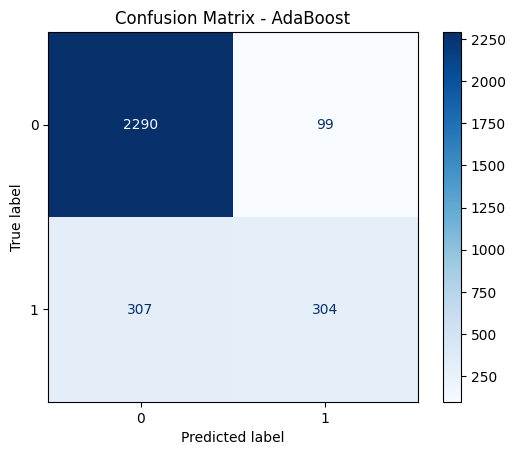

In [56]:
# Model Performance Evaluation
# Confusion matrix to show the number of true positives, false positives, true negatives, and false negatives.

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix for AdaBoost
cm = confusion_matrix(y_test, adaboost_clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - AdaBoost')
plt.show()


# Confusion Matrix Breakdown:
* True Negatives (TN): The model correctly predicted non-churn (0) for 2290 customers. This means these customers did not churn, and the model predicted correctly.
* False Positives (FP): The model incorrectly predicted churn (1) for 99 customers who actually did not churn. This means that these customers were misclassified as churners, but they remained with the bank.
* False Negatives (FN): The model incorrectly predicted non-churn (0) for 307 customers who actually churned. This means the model failed to identify these churners.
* True Positives (TP): The model correctly predicted churn (1) for 304 customers. These customers actually churned, and the model successfully identified them.


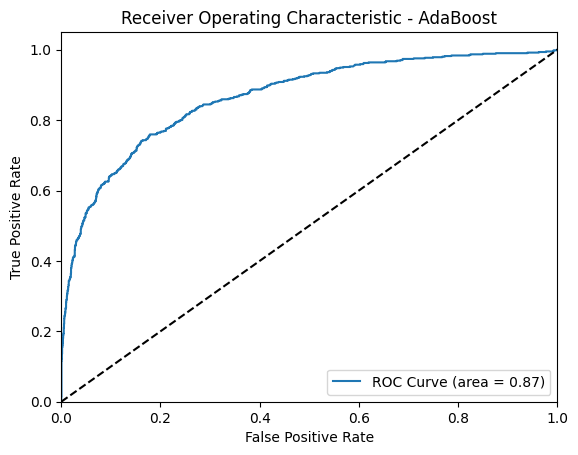

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

# AdaBoost ROC curve
y_proba = adaboost_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC Curve
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - AdaBoost')
plt.legend(loc='lower right')
plt.show()


The ROC curve shows that your AdaBoost model performs very well in identifying churners with an AUC of 0.87. This indicates that the model has a high capability of distinguishing churners from non-churners. It means that about 87% of the time, the model will rank a randomly chosen churner higher than a randomly chosen non-churner.

# **Conclusion**

In conclusion, the AdaBoost model provides an effective and reliable solution for predicting customer churn. By leveraging a balanced approach between precision and recall, the model allows the bank to focus its retention efforts on customers who are most likely to churn. Further improvements could be made through hyperparameter tuning and experimentation with more complex models on larger datasets.

For this project, we decided to skip hyperparameter tuning due to the size of the dataset and the primary goals of the analysis. While hyperparameter tuning can improve model performance by fine-tuning algorithm-specific parameters, it is typically more critical for larger, more complex datasets. Since our dataset is relatively small and the model performance with default parameters was already strong—particularly for the AdaBoost model, which achieved an ROC AUC of 0.87—we chose to focus on model selection and evaluation rather than exhaustive tuning. Furthermore, for a portfolio project, the priority was to demonstrate key steps in the machine learning pipeline, including exploratory data analysis (EDA), feature engineering, and model evaluation. Hyperparameter tuning could be a next step in a larger-scale production environment or with a more complex dataset.



# Comparison Table for each Model

|Model                | Precision | Recall | F1-Score | ROC AUC |
|------ --------------|-----------|--------|----------|---------|
| Logistic Regression | 0.40      | 0.74   | 0.52     | 0.805   |
| Random Forest       | 0.77      | 0.45   | 0.57     | 0.865   |
| Ada Boost           | 0.75      | 0.50   | 0.60     | 0.865   |